
<h1  style="text-align: center" class="list-group-item list-group-item-action active">1. Introduction</h1><a id = "1" ></a>

In the realm of machine learning, the significance of selecting and engineering good features cannot be overstated. Features are the underlying variables or characteristics of the data that are used as inputs to a machine learning model. The process of data preprocessing plays a crucial role in preparing raw data and transforming it into a format suitable for machine learning models. It represents the initial and critical step in the creation of a machine learning project.

Raw data seldom comes in a clean and organized format. To effectively work with data and achieve meaningful results, it is essential to clean and format it appropriately. This is where data preprocessing comes into play.

Real-world data often contains noise, missing values, and may not be directly usable for machine learning models. Data preprocessing tasks are essential for cleaning and transforming the data to make it suitable for machine learning models. This not only improves the accuracy and efficiency of the models but also ensures more reliable and robust results.

The data preprocessing pipeline generally involves the following steps:

**Gathering the Dataset:** Acquiring the relevant dataset from various sources.

**Importing Libraries:** Importing the necessary libraries and packages required for data processing and modeling.

**Loading Datasets:** Loading the acquired dataset into the environment for analysis and manipulation.

**Handling Missing Data:** Addressing missing values in the dataset, either by imputing them or removing them appropriately.

**Encoding Categorical Data:** Converting categorical variables into numerical form, as machine learning models require numerical inputs.

While traditional approaches for data preprocessing are widely used, it is essential to explore alternative and innovative techniques that could potentially revolutionize your next machine learning project.

In this notebook, we will delve into different approaches for data preprocessing, aiming to enhance the quality and usability of the data for machine learning models. These alternative techniques can be game-changers in terms of improving model performance and gaining deeper insights from the data.

# **Dataset:**
**Description:**
Banks earn a major revenue from lending loans. But it is often associated with risk. The borrower's may default on the loan. To mitigate this issue, the banks have decided to use Machine Learning to overcome this issue. They have collected past data on the loan borrowers & would like you to develop a strong ML Model to classify if any new borrower is likely to default or not.

The dataset is enormous & consists of multiple deteministic factors like borrowe's income, gender, loan pupose etc. The dataset is subject to strong multicollinearity & empty values. Can you overcome these factors & build a strong classifier to predict defaulters?

**Acknowledgements:**
This dataset has been referred from Kaggle.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

<h1  style="text-align: center" class="list-group-item list-group-item-action active">2. Handling Missing Values</h1><a id = "2" ></a>
Missing data is a common occurrence in real-world datasets and becomes more prevalent as the dataset size increases. There are various reasons why data points might be missing, some of which are listed below:

**Merging of Source Data Sets**: When combining data from different sources, some data points may not align or match, leading to missing values.

**Random Events**: In certain cases, data might be missing due to random occurrences or errors during data collection.

**Failures of Measurement:** Missing data can also result from measurement failures or technical issues during the data collection process.



<h3  style="text-align: center" class="list-group-item list-group-item-warning"> 2.1 Simple Numerical Summaries </h3><a id = "2.1.4" ></a>


Moving Forward lets try to analyse numerical summary of missing attributes. Simple numerical summaries are effective at identifying problematic predictors and samples when the data become too large to visually inspect.

In [ ]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [ ]:
missing_percent = get_numerical_summary(df)

loan_limit : 3344 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.645%)
Upfront_charges : 39642 (26.664%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
submission_of_application : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)



<h2  style="text-align: center" class="list-group-item list-group-item-success"> 2.2 Methods to Handle Missing Data</h2><a id = "2.2" ></a>

As we Know if our data has missing values than our model will not train except few models which can tolerate them like some tree based models but the point is we want to handle this and how can we handle them. So, in this notebook to handle missing data I will discuss following techniques :-

- Deletion of Data
- Encoding Missingness
- Imputation Methods


<h3  style="text-align: center" class="list-group-item list-group-item-warning"> Deletion of Data </h3><a id = "2.1.1" ></a>



Dealing with missing values through the removal of entire attributes or samples is the simplest approach, but it requires careful consideration of various aspects of the data before implementation. There are two cases to consider: Deletion of Attributes and Deletion of Samples.

**Case 1: Deletion of Attributes**

If the number of attributes (N) is relatively small (ranging from 1 to 10), it is generally not recommended to delete attributes that contain missing values. However, if an attribute has a high percentage of missing values (around 80-90%), it might be beneficial to consider deleting that attribute instead of attempting to predict missing values based on the available 10-20% of data.

**Case 2: Deletion of Samples**

For datasets with a large number of samples (M) relative to the task, deleting samples might be a viable option. However, if a sample contains only a few missing values with respect to attributes, it is preferable to explore methods for filling those missing values rather than outright removal.

It is essential to carefully weigh the pros and cons of attribute or sample deletion based on the specific characteristics of the data and the requirements of the task.

While the implementation will show how to delete data for both cases, it is crucial to consider the context of your project and interpret the results accordingly.

**Note: Deletion of samples should be approached with caution, especially when obtaining samples is challenging or when the dataset contains a limited number of samples (rows). In such cases, removing samples may lead to loss of valuable information.**

**Deletion of an Attribute**

Based on the simple numerical summaries, the attribute "Upfront_charges" has the highest percentage of missing values, which accounts for 26.664% of the data. While this percentage is not ideal for outright removing a feature, for the purpose of implementation, I will proceed to remove this particular feature.

It's important to note that this decision is primarily for demonstration purposes and should be carefully considered in a real-world scenario. Removing features with significant missing values can lead to information loss and potentially impact the performance and integrity of the machine learning model. In practice, one should explore alternative strategies such as data imputation to handle missing values more effectively. However, for the sake of showcasing the implementation, the "Upfront_charges" feature will be removed from the dataset.

In [ ]:
df_temp = df.copy()

In [ ]:
# Threshold to remove attribute having missing values greater than threshold
ATTRIBUTE_THRESHOLD = 25 #25% in this case

for col, per in missing_percent.items():
    if per > ATTRIBUTE_THRESHOLD:
        df_temp.drop(col, axis = 1, inplace = True)


Upon generating a numerical summary of the DataFrame, we observed that the attribute "Upfront_charges" was removed from the dataset. This decision was based on the fact that "Upfront_charges" had a missing values percentage greater than the threshold we defined earlier. As a result, we deemed it appropriate to remove this feature from the dataset to handle the missing values effectively and maintain data integrity according to the defined threshold.

In [ ]:
_ = get_numerical_summary(df_temp)

loan_limit : 3344 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.645%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
submission_of_application : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


In [ ]:
#del df_temp

**Deletion of the Samples**

We will attempt to delete the samples that have missing values in more than 5 attributes. The goal is to remove these samples from the dataset to handle the issue of multiple missing values effectively. By doing so, we aim to enhance the data quality and ensure that the remaining samples have a higher degree of completeness, which can be beneficial for subsequent analysis or modeling tasks.

In [ ]:
#df_temp = df.copy()

In [ ]:
# Getting Missing count of each sample
for idx in range(df_temp.shape[0]):
    df_temp.loc[idx, 'missing_count'] = df_temp.iloc[idx, :].isnull().sum()


In [ ]:
df_temp['missing_count']

0         3.0
1         7.0
2         1.0
3         2.0
4         1.0
         ... 
148665    1.0
148666    1.0
148667    1.0
148668    1.0
148669    1.0
Name: missing_count, Length: 148670, dtype: float64

In [ ]:
# Threshold to remove samples having missing values greater than threshold
SAMPLE_THRESHOLD = 1

print("Samples Before Removal : {}".format(df_temp.shape[0]))

df_temp.drop(df_temp[df_temp['missing_count'] > SAMPLE_THRESHOLD].index, axis = 0, inplace = True)

print("Samples After Removal : {}".format(df_temp.shape[0]))
df_temp['missing_count']


Samples Before Removal : 101309
Samples After Removal : 101309


2         1.0
4         1.0
5         1.0
6         1.0
7         1.0
         ... 
148665    1.0
148666    1.0
148667    1.0
148668    1.0
148669    1.0
Name: missing_count, Length: 101309, dtype: float64

<h3  style="text-align: center" class="list-group-item list-group-item-warning"> Imputation Methods </h3><a id = "2.2.3" ></a>



Another approach for handling missing values is imputation or estimation. Imputation involves using information and relationships among non-missing attributes to estimate and fill in the missing values.

When deciding whether to use imputation methods for attributes with 50-60% missing values, the appropriateness depends on the specific dataset. For instance, an attribute with 60% missing values may have a strong correlation with another attribute, which can aid in filling those missing values effectively. However, in cases where a column like an ID column is independent of all other columns and has missing values around 10%, using imputation methods may not yield the desired results.

The selection of an appropriate imputation model depends on the dataset's characteristics and the specific relationships among the attributes. While virtually any machine learning model can be used for imputation, this section will focus on several good candidates that can be considered for the task. It is important to ensure that the imputation model is numerically stable and not excessively influenced by outlying data points to obtain reliable results.

We can see all missing values from the dataset are gone. Now as we temporarily encode categorical variables because we will encode them in later section so lets decode them.

<h1  style="text-align: center" class="list-group-item list-group-item-action active">3. Encoding Categorical Attributes</h1><a id = "3" ></a>


Categorical Features are those that contain qualitative data.This Section focuses primarily on methods that encode categorical data to numeric values.

Categorical variables/features are any feature type can be classified into three major types:

- Nominal
- Ordinal
- Binary

**Nominal variables** are variables that have two or more categories which do not have any kind of order associated with them. For Example if our dataset has any 4 types of colors, i.e. Red, Blue, Orange, Green it can be considered as a nominal variable.

**Ordinal variables** on the other hand, have “levels” or categories with a particular order associated with them. For example, an ordinal categorical variable can be a feature with three different levels: low, medium and high. Order is important.

**Binary Variables** are same as nominal variables but with only categories For example, if gender is classified into two groups, i.e. male and female.

For Nominal Variables We generally uses Label Encoding Scheme in which we encode each category by just converting it to some integer values this kind of encoding can work in case of Ordinal variables but **for label encoding it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them**. This ordering issue is addressed in another common alternative approach called 'One-Hot Encoding'.

One-Hot-Encoding has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space. **The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality.**

Another big issue with encoding schemes is new category or while splitting data in train/validation/test set all samples of the rare classes may split into validation/test set then during it will raise error while predicting.  


In [ ]:
df_temp = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder


## Again we have to temporarily encode variables
lb = LabelEncoder()

cat_cols = [col for col in df_temp.columns if df_temp[col].dtype == 'object']

for col in cat_cols:
    df_temp[col] = lb.fit_transform(df_temp[col])


<h3  style="text-align: center" class="list-group-item list-group-item-warning"> 3. Correlation Heatmap </h3><a id = "2.1.2" ></a>

The correlation heatmap measures the nullity correlation between different columns (attributes) in the dataset. It provides insights into how the presence or absence of one feature influences the other.

The nullity correlation value ranges from -1 to 1:

- A value of -1 indicates that if one column is present, the other is almost certainly absent.
- A value of 0 implies no dependence between the columns; their presence or absence is unrelated.
- A value of 1 means that if one column is present, the other is also certainly present.
Unlike a typical correlation heatmap, the one shown here contains many missing values. Columns that are always complete or always empty are removed from the visualization as they do not exhibit meaningful correlation.

The heatmap is useful for identifying data completeness correlations between pairs of attributes. However, it has some limitations. It does not offer in-depth insights into broader relationships beyond pairwise correlations. Additionally, for very large datasets, the heatmap may lack special support due to computational constraints.

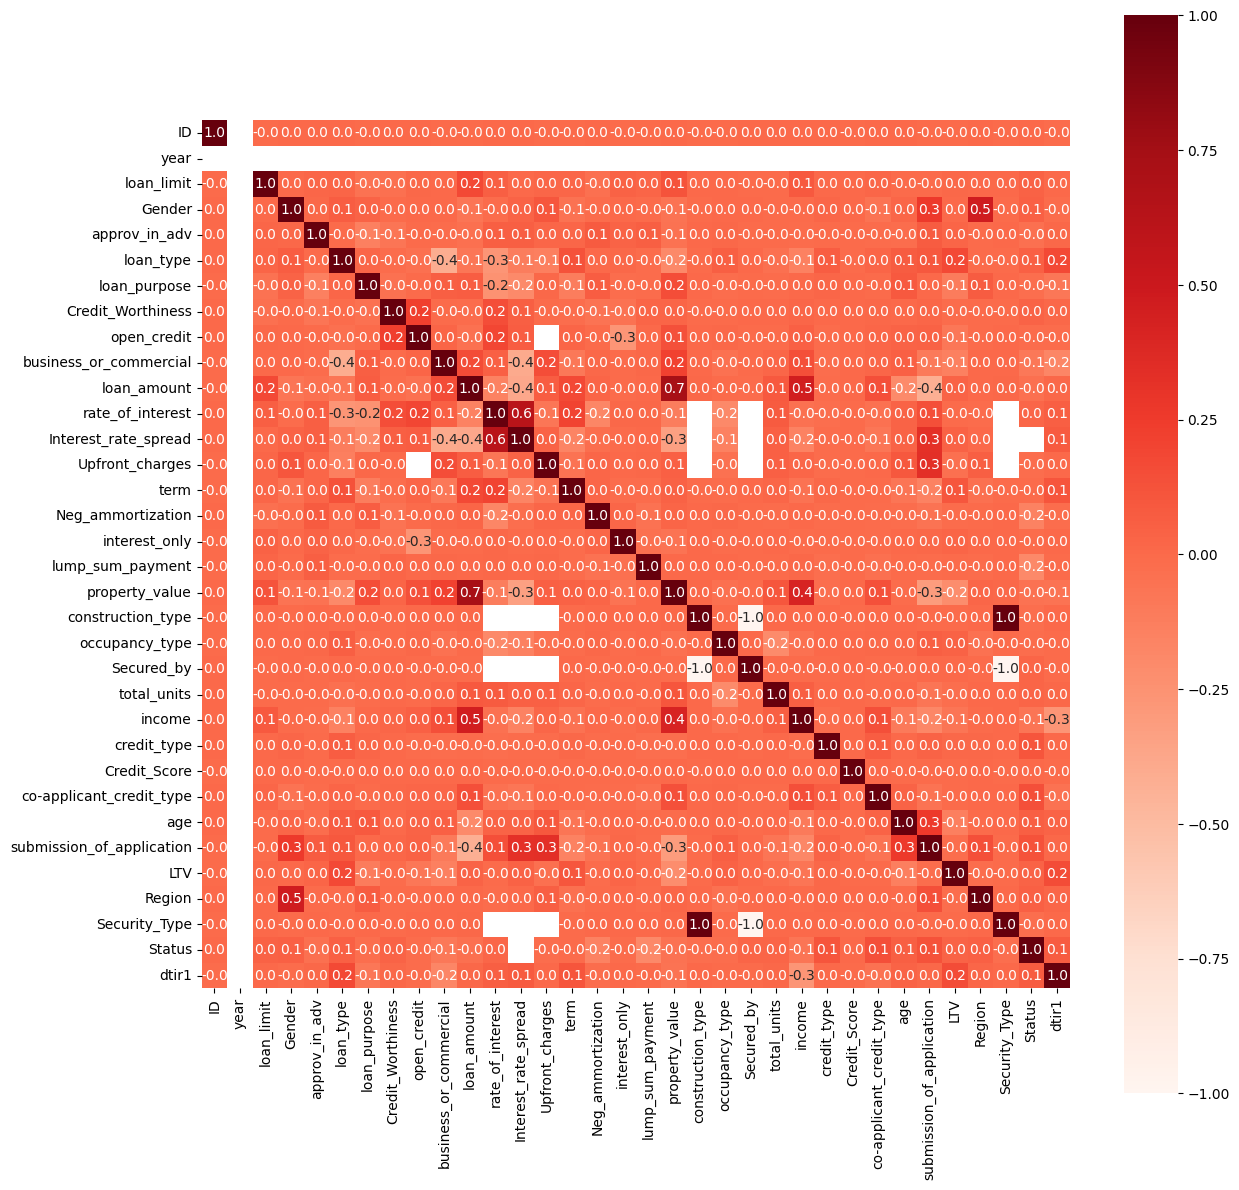

In [ ]:
# find the correlation between columns.
corr = df_temp.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, cmap='Reds',square=True, fmt=".1f")
plt.show()

<Axes: >

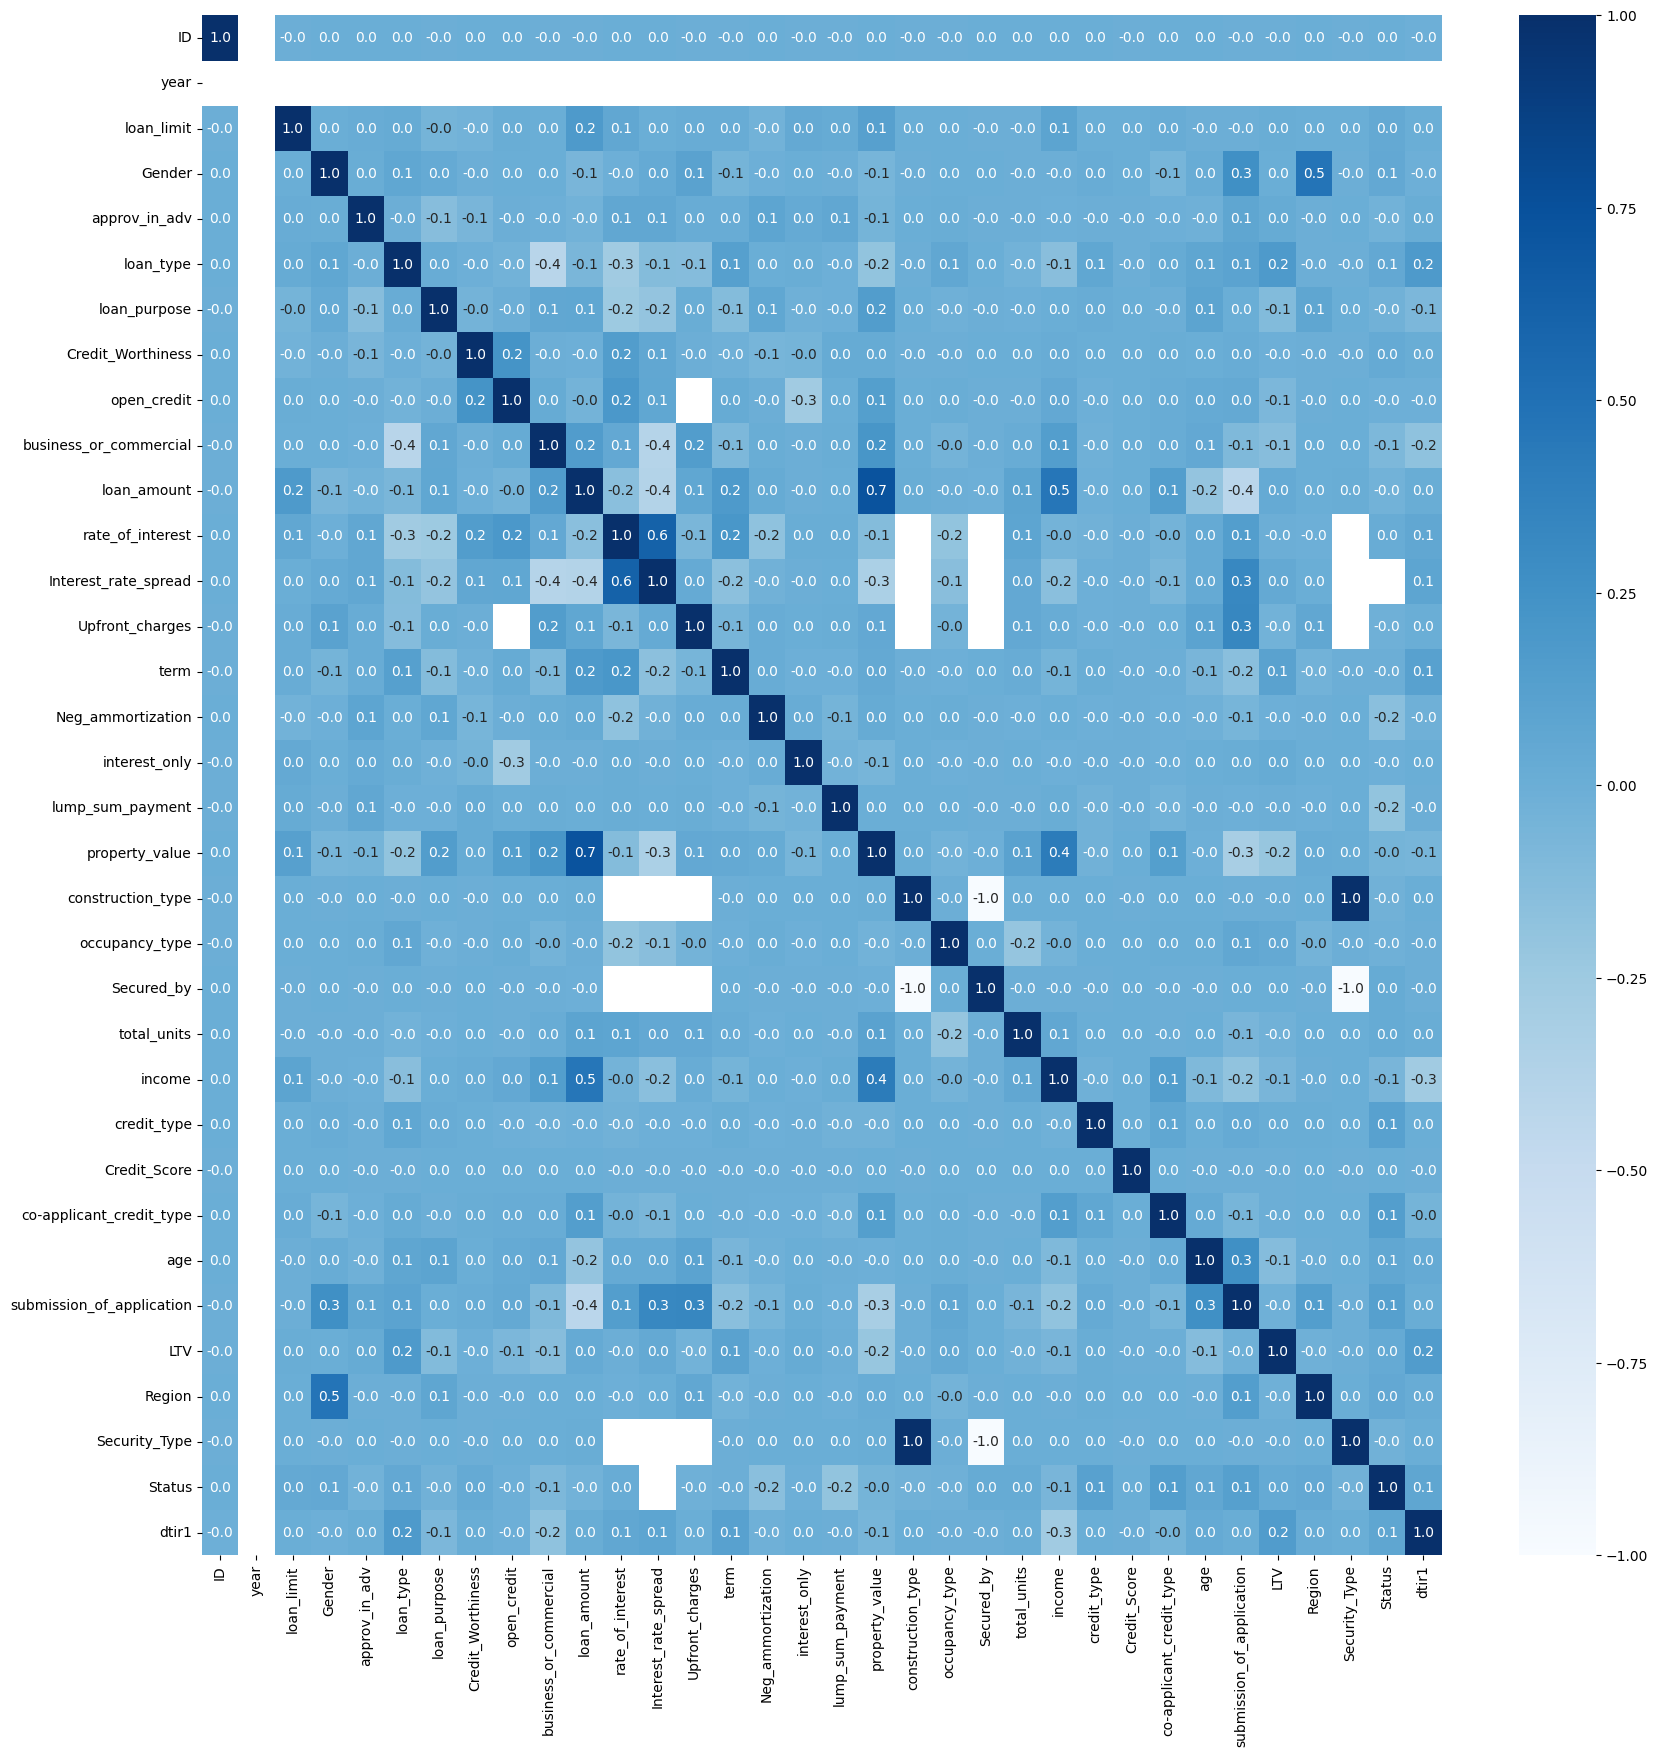

In [ ]:
correlation_matrix = df_temp.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')